In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [231]:
x.shape

(1269,)

Text(0.5, 1.0, 'New PCB')

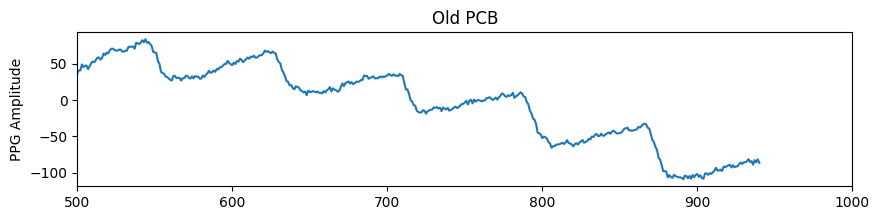

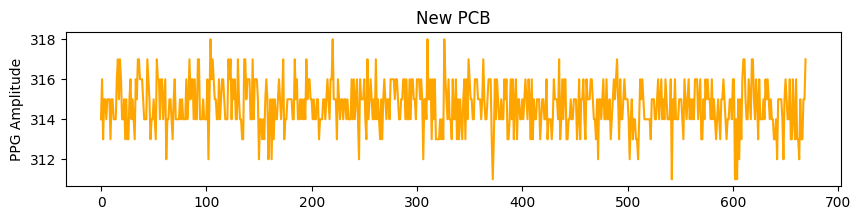

In [254]:
from scipy.signal import detrend


f = plt.figure(figsize=(10, 2))
df_pcb2 = pd.read_csv("/Users/tpfeffer/Downloads/Old.csv")
x = df_pcb2["ecg"].values[0:-100]
x_detrended = detrend(x)

plt.plot(x_detrended)
plt.xlim(500, 1000)
plt.ylabel("PPG Amplitude")
plt.title("Old PCB")
# plt.ylim(13500, 14200)
f = plt.figure(figsize=(10, 2))
df_pcb3 = pd.read_csv("/Users/tpfeffer/Downloads/ble_data.csv")

x = df_pcb3["ecg"].values[0:-100]
# detrend x
x_detrended = detrend(x)

plt.plot(x, c="orange")
# plt.xlim(0, 600)
plt.ylabel("PPG Amplitude")
plt.title("New PCB")

# plt.xlim(500,1000)
# plt.ylim(-700, 700)

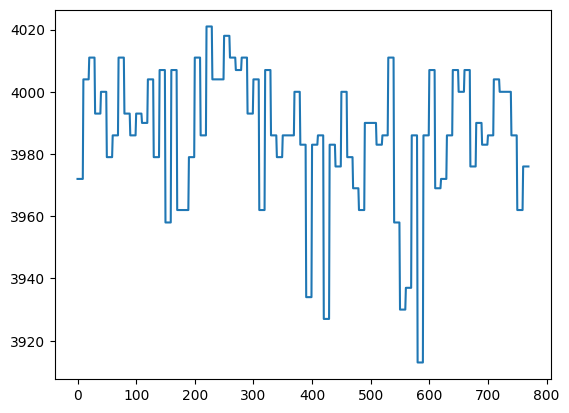

In [256]:
plt.plot(df_pcb3["resp"])

In [234]:
# remove zeros

x = df_pcb3["timestamp"].values.copy()

# remove zeros
x = x[x != 0]

y = np.diff(x)
y = y[y > 0]

y / 1000

array([100.86 , 100.922, 100.952, 100.922, 100.952, 100.952, 100.922,
       100.952, 100.952, 100.952, 100.922, 100.952, 100.952, 100.952,
       101.013, 100.861, 100.952, 100.952, 100.952, 100.952, 100.953,
       100.952, 100.952, 100.952, 100.952, 100.922, 100.952, 100.952,
       100.952, 100.952, 100.953, 100.952, 100.952, 100.952, 100.952,
       100.952, 101.014, 100.891, 100.952, 100.982, 100.922, 100.983,
       100.952, 100.952, 100.983, 100.921, 100.983, 100.952, 100.952,
       100.952, 100.953, 101.074, 100.83 , 100.952, 100.922, 100.952,
       100.952, 100.952, 100.952, 100.983, 100.952, 100.952, 100.922,
       100.983, 100.952, 100.921, 100.952, 100.983, 100.952, 100.952,
       100.953, 100.952, 100.952, 100.952, 100.952, 100.952, 100.983,
       100.952, 100.952, 100.952, 100.953, 100.982, 100.922, 100.952,
       100.983, 100.952, 100.952, 100.952, 101.074, 100.83 , 100.953,
       100.952, 100.921, 100.983, 100.922, 100.952, 100.952, 100.952,
       100.952, 100.

In [189]:
int(9.8)

9

Text(0.5, 1.0, 'New PCB')

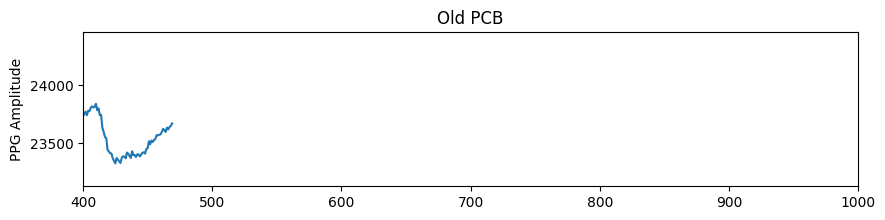

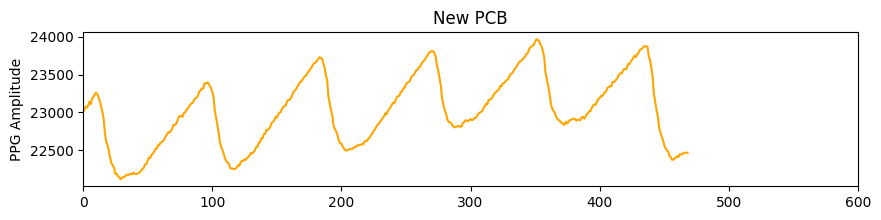

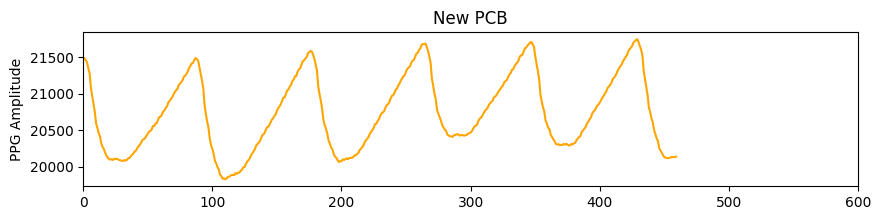

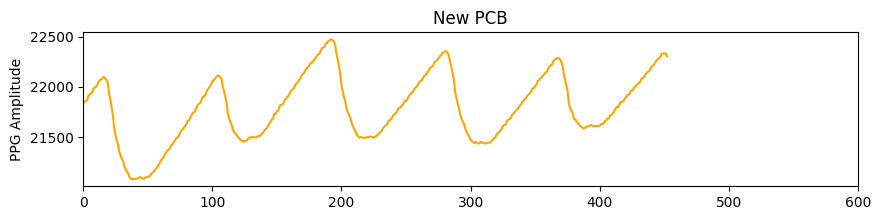

In [83]:
f = plt.figure(figsize=(10, 2))
df_pcb2 = pd.read_csv("/Users/tpfeffer/Downloads/Adc0.csv")

plt.plot(df_pcb2["ecg"])
plt.xlim(400, 1000)
plt.ylabel("PPG Amplitude")
plt.title("Old PCB")
f = plt.figure(figsize=(10, 2))
df_pcb3 = pd.read_csv("/Users/tpfeffer/Downloads/Adc1.csv")

plt.plot(df_pcb3["ecg"].values[0:-100], c="orange")
plt.xlim(0, 600)
plt.ylabel("PPG Amplitude")
plt.title("New PCB")

f = plt.figure(figsize=(10, 2))
df_pcb3 = pd.read_csv("/Users/tpfeffer/Downloads/Adc2.csv")

plt.plot(df_pcb3["ecg"].values[0:-100], c="orange")
plt.xlim(0, 600)
plt.ylabel("PPG Amplitude")
plt.title("New PCB")

f = plt.figure(figsize=(10, 2))
df_pcb3 = pd.read_csv("/Users/tpfeffer/Downloads/Adc3.csv")

plt.plot(df_pcb3["ecg"].values[0:-100], c="orange")
plt.xlim(0, 600)
plt.ylabel("PPG Amplitude")
plt.title("New PCB")


# plt.xlim(600,800)
# plt.ylim(190, 210)

24.37142857142857

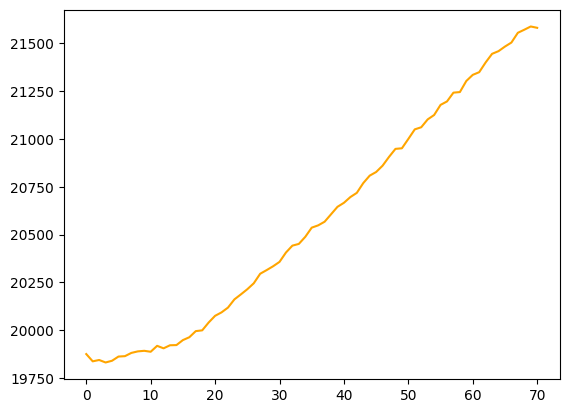

In [128]:
df_pcb2 = pd.read_csv("/Users/tpfeffer/Downloads/Adc2.csv")
plt.plot(df_pcb2["ecg"].values[107:178], c="orange")


np.mean(np.diff((df_pcb2["ecg"].values[107:178])))

14.385714285714286

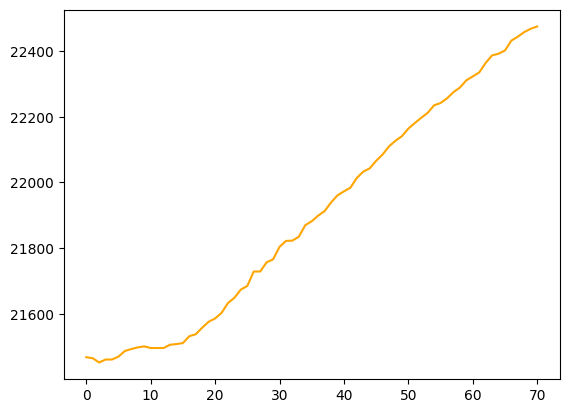

In [152]:
df_pcb = pd.read_csv("/Users/tpfeffer/Downloads/Adc3.csv")

plt.plot(df_pcb3["ecg"].values[122:193], c="orange")

np.mean(np.diff((df_pcb3["ecg"].values[122:193])))

# print(193-122)

70


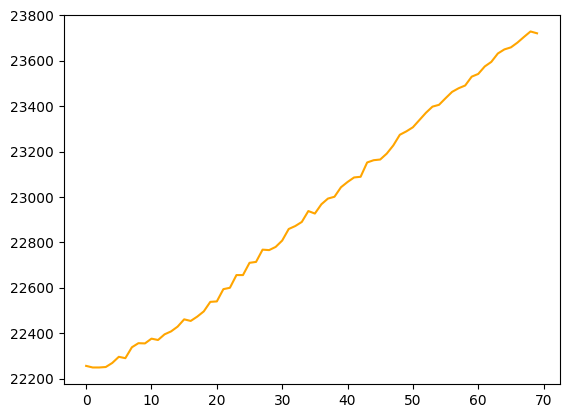

In [150]:
df_pcb1 = pd.read_csv("/Users/tpfeffer/Downloads/Adc1.csv")
plt.plot(df_pcb1["ecg"].values[115:185], c="orange")


np.mean(np.diff((df_pcb1["ecg"].values[115:185])))

print(185-115)

11.666666666666666

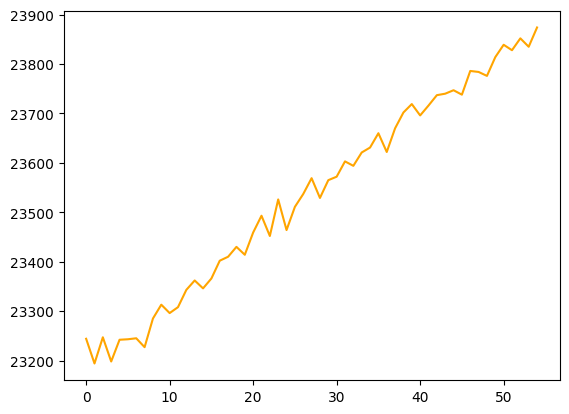

In [149]:
df_pcb1 = pd.read_csv("/Users/tpfeffer/Downloads/Adc0.csv")
plt.plot(df_pcb1["ecg"].values[270:325], c="orange")


np.mean(np.diff((df_pcb1["ecg"].values[270:325])))

In [21]:
import asyncio
import nest_asyncio
from collections import deque

nest_asyncio.apply()

# Constants for your specific setup
DEVICE_ADDRESS = "43D90F9E-0D4A-A85F-51ED-4DD41F250E2F"
UART_TX_UUID = "6E400003-B5A3-F393-E0A9-E50E24DCCA9E"

BleakScanner = __import__("bleak").BleakScanner

async def scan():
    devices = await BleakScanner.discover()
    for d in devices:
        print(f"Name: {d.name}, Address: {d.address}")

await scan()


async def find_all_ads1292():
    devices = await BleakScanner.discover()
    # Filter for devices named ADS1292
    my_devices = [d for d in devices if d.name == "ADS1292"]

    for i, d in enumerate(my_devices):
        print(f"Device {i}: Address {d.address}")
    return [d.address for d in my_devices]

addresses = await find_all_ads1292()

import asyncio
import struct
import nest_asyncio
from bleak import BleakClient

nest_asyncio.apply()

ppg_data = []

# --- CONFIGURATION ---
# Use the specific macOS UUID you found
DEVICE_ADDRESS = "A49235B2-219B-C3CB-2FAC-4ABEBBBD4278"
DEVICE_ADDRESS =  "43D90F9E-0D4A-A85F-51ED-4DD41F250E2F"
UART_TX_UUID = "6E400003-B5A3-F393-E0A9-E50E24DCCA9E"

def handle_rx(sender, data):
    """
    This function triggers every time the nRF52840 sends a packet.
    It unpacks the 16-byte binary chunks.
    """
    packet_size = 16
    for i in range(0, len(data), packet_size):
        chunk = data[i:i+packet_size]
        if len(chunk) == packet_size:
            try:
                val1, val2, val3, val4 = struct.unpack('<IIII', chunk)
                ppg_data.append(val3)
                print(f"Channel A: {val1:5} | Channel B: {val2:5} | Timestamp: {val3}")
            except Exception as e:
                print(f"Parsing error: {e}")

async def run_listener():
    print(f"Connecting to ADS1292 at {DEVICE_ADDRESS}...")
    try:
        async with BleakClient(DEVICE_ADDRESS) as client:
            if client.is_connected:

                await client.start_notify(UART_TX_UUID, handle_rx)
                while True:
                    await asyncio.sleep(1)
    except Exception as e:
        print(f"An error occurred: {e}")

# Run the listener
await run_listener()


Name: None, Address: 22C8ACC5-9FF6-64C2-88A4-483B9C343534
Name: LE-Frappe Soundsystem, Address: 34040E5B-4BC8-E75F-1AD0-9F32C2CCDF10
Name: None, Address: 8F383F0C-1C99-64C9-4DDC-3F1EFD86ACF6
Name: TY, Address: 4AB96383-2C0B-F4EF-6D33-9DDEE70991D1
Name: None, Address: 02F3097A-2BA4-E3E5-6488-37CC10D1F275
Name: None, Address: 5ABB5220-F8F4-6D9F-AC69-5F0B551A7C5E
Name: None, Address: ACA4A8E5-43A2-3D07-44E2-6DA9C306BC1D
Name: None, Address: 6E2231D5-2971-480D-034A-0C5F9A799924
Name: None, Address: E647E50E-5B39-E843-284C-4E923E6E29AC
Name: None, Address: 604F437B-2FD2-FC90-8189-4FA117911CCA
Name: ENVY Photo 6200 series, Address: D60C7F95-02B9-2220-0B60-4D156C504877
Name: None, Address: 28D416AB-43D5-61F3-130E-9AF1D11B76C8
Name: None, Address: 54E9B2DA-FB24-B049-7F8D-0A5575E13257
Name: None, Address: 9D7EE1D0-300A-470E-634A-3DAD4A8D931D
Name: None, Address: 779DBCBE-EC16-AE62-3840-A4DFA7E06318
Name: None, Address: 45503DB7-8AD0-3047-A694-D92CB9C6496C
Name: None, Address: DA161626-CEFE-D7C2

CancelledError: 

In [22]:
import numpy as np
import matplotlib.pyplot as plt

ppg_data = np.array(ppg_data)

array([6.65405235, 5.70691601, 5.00485909, 3.82819795, 5.08661417,
       5.37676609, 4.65062112, 4.47008482, 3.74520569, 3.6244801 ,
       5.22058273, 5.21646827, 3.14082337, 4.44673489, 4.777631  ,
       3.79635079])

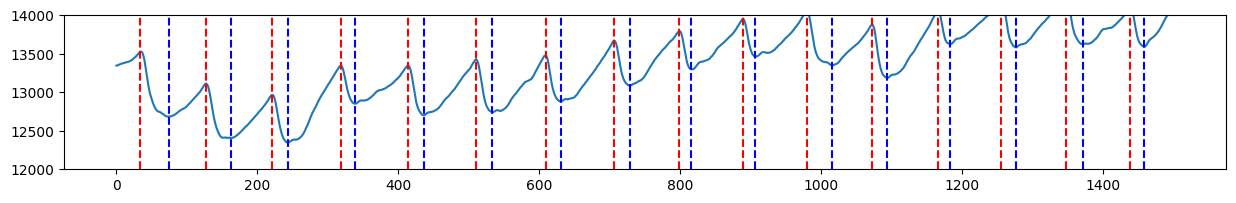

In [50]:
f = plt.figure(figsize=(15, 2))

x = ppg_data[500:2000]
plt.plot(x)

# plt.xlim(500, 1500)
plt.ylim(12000, 14000)

# find peaks
from scipy.signal import find_peaks

peaks, _ = find_peaks(x, height=12500, distance=50)
troughs, _ = find_peaks(-x, height=-15000, distance=50)

for peak in peaks:
    plt.axvline(x=peak, color='red', linestyle='--')

for trough in troughs:
    plt.axvline(x=trough, color='blue', linestyle='--')

100*(x[peaks]-x[troughs]) / x[troughs]